In [0]:
'''Here we are studying customer review dateset.
we are using Zip file which is being taken from amazon website 
and the name of the dateset is amazon reviews us Gift Card v1 00.The review dateset comprises of many customers'''

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import csv
import gzip
import matplotlib.pyplot as plt
from matplotlib import colors
from collections import defaultdict
f=gzip.open('amazon_reviews_us_Gift_Card_v1_00.tsv.gz','rt') 
reader=csv.reader(f,delimiter='\t');header=next(reader)
dataset=[]
for line in reader:
  d=dict(zip(header,line))
  for field in['helpful_votes','star_rating','total_votes']:
    d[field]=int(d[field])
  for field in['verified_purchase','vine']:
    if d[field]=='Y':
      d[field]=True
    else:
      d[field]=False
  dataset.append(d)

In [0]:
'''each customer having his own review id
customer credentials details present such as which country 
marketplace customer belongs to then various product details present 
such as product id, product_category, product_parent, product_title
then details on customer reviews present such as review_body, 
review_date,review_headline,review_id,customer star ratings,his total votes,
his votes whether he found the store peoples helpful or not.
then details on whether purchase verified or not verified also given.
we now need to do some cleaning on the data so that our data becomes more meaningful
we should remove unnecessary and trivial data which 
would only create more confusions and won't be helpful in 
building significant data models and projecting accurate predictions'''

In [0]:
dataset[0]
len(dataset)


{'customer_id': '24371595',
 'helpful_votes': 0,
 'marketplace': 'US',
 'product_category': 'Gift Card',
 'product_id': 'B004LLIL5A',
 'product_parent': '346014806',
 'product_title': 'Amazon eGift Card - Celebrate',
 'review_body': 'Great birthday gift for a young adult.',
 'review_date': '2015-08-31',
 'review_headline': 'Five Stars',
 'review_id': 'R27ZP1F1CD0C3Y',
 'star_rating': 5,
 'total_votes': 0,
 'verified_purchase': True,
 'vine': False}

148310

In [0]:
'''HERE WE TRY TO FILTER REVIEWS BY DATE.FOR THE MOMENT WE WILL FILTER BASED ON REVIEW'S YEAR
WE GOT ERROR.SO FIRST WE HAVE TO PREPROCESS OUR DATESET TO EXTRACT ONLY THOSE
ENTRIES CONTAINING A REVIEW DATE FIELD'''

In [0]:
for d in dataset:
  d['yearint']=int(d['review_date'][:4])

KeyError: ignored

In [0]:
dataset=[d for d in dataset if 'review_date' in d ]
print('\n')
len(dataset)

148309

In [0]:
#now let us filter old reviews i.e. those before 2010

In [0]:
for d in dataset:
  d['yearint']=int(d['review_date'][:4])
dataset=[d for d in dataset if d['yearint'] >2010]
dataset[0]
len(dataset)

{'customer_id': '24371595',
 'helpful_votes': 0,
 'marketplace': 'US',
 'product_category': 'Gift Card',
 'product_id': 'B004LLIL5A',
 'product_parent': '346014806',
 'product_title': 'Amazon eGift Card - Celebrate',
 'review_body': 'Great birthday gift for a young adult.',
 'review_date': '2015-08-31',
 'review_headline': 'Five Stars',
 'review_id': 'R27ZP1F1CD0C3Y',
 'star_rating': 5,
 'total_votes': 0,
 'verified_purchase': True,
 'vine': False,
 'yearint': 2015}

146727

In [0]:
#let us write other list comprehension to exclude reviews with low helpful rates

In [0]:
dataset=[d for d in dataset if d['total_votes']<3 
         or d['helpful_votes']/d['total_votes']>=0.5]
dataset[0]
len(dataset)

{'customer_id': '24371595',
 'helpful_votes': 0,
 'marketplace': 'US',
 'product_category': 'Gift Card',
 'product_id': 'B004LLIL5A',
 'product_parent': '346014806',
 'product_title': 'Amazon eGift Card - Celebrate',
 'review_body': 'Great birthday gift for a young adult.',
 'review_date': '2015-08-31',
 'review_headline': 'Five Stars',
 'review_id': 'R27ZP1F1CD0C3Y',
 'star_rating': 5,
 'total_votes': 0,
 'verified_purchase': True,
 'vine': False,
 'yearint': 2015}

146461

In [0]:
'''let us filter our dataset to discard inactive users i.e. 
users who have written only a single review in this directory.
then we can filter to keep users with 2 or more reviews'''

In [0]:
nReviewperuser=defaultdict(int)
for d in dataset:
  nReviewperuser[d['customer_id']]+=1
dataset[0]
dataset=[d for d in dataset if nReviewperuser[d['customer_id']]>=2 ]
dataset[0]
len(dataset)

{'customer_id': '24371595',
 'helpful_votes': 0,
 'marketplace': 'US',
 'product_category': 'Gift Card',
 'product_id': 'B004LLIL5A',
 'product_parent': '346014806',
 'product_title': 'Amazon eGift Card - Celebrate',
 'review_body': 'Great birthday gift for a young adult.',
 'review_date': '2015-08-31',
 'review_headline': 'Five Stars',
 'review_id': 'R27ZP1F1CD0C3Y',
 'star_rating': 5,
 'total_votes': 0,
 'verified_purchase': True,
 'vine': False,
 'yearint': 2015}

{'customer_id': '48872127',
 'helpful_votes': 0,
 'marketplace': 'US',
 'product_category': 'Gift Card',
 'product_id': 'BT00CTOYC0',
 'product_parent': '506740729',
 'product_title': 'Amazon.com $15 Gift Card in a Greeting Card (Amazon Surprise Box Design)',
 'review_body': 'I love that I have instant, helpful options when I forget a birthday! Thanks for saving the day Amazon!',
 'review_date': '2015-08-31',
 'review_headline': 'Quick Solution for Forgotten Occasion',
 'review_id': 'RVN4P3RU4F8IE',
 'star_rating': 5,
 'total_votes': 0,
 'verified_purchase': True,
 'vine': False,
 'yearint': 2015}

11048

In [0]:
#let us remove short reviews which may be uninformative

In [0]:
dataset=[d for d in dataset if len(d['review_body'].split())>=10]
dataset[0]
len(dataset)

{'customer_id': '48872127',
 'helpful_votes': 0,
 'marketplace': 'US',
 'product_category': 'Gift Card',
 'product_id': 'BT00CTOYC0',
 'product_parent': '506740729',
 'product_title': 'Amazon.com $15 Gift Card in a Greeting Card (Amazon Surprise Box Design)',
 'review_body': 'I love that I have instant, helpful options when I forget a birthday! Thanks for saving the day Amazon!',
 'review_date': '2015-08-31',
 'review_headline': 'Quick Solution for Forgotten Occasion',
 'review_id': 'RVN4P3RU4F8IE',
 'star_rating': 5,
 'total_votes': 0,
 'verified_purchase': True,
 'vine': False,
 'yearint': 2015}

6915

In [0]:
#average star rating for the entire dataset comes out as 4.806

In [0]:
ratings=[d['star_rating'] for d in dataset]
sum(ratings)/len(ratings)

4.806073752711497

In [0]:
'''from the scatter plot we understand that helpful_votes 
is positively correlated with total_votes i.e. 
with increase in helpful votes total votes increase accordingly.'''

[Text(0, 0.5, 'total_votes'),
 Text(0.5, 0, 'helpful_votes'),
 Text(0.5, 1.0, 'helpful_votes vs total_votes')]

(0.0, 100.0, 0.0, 100.0)

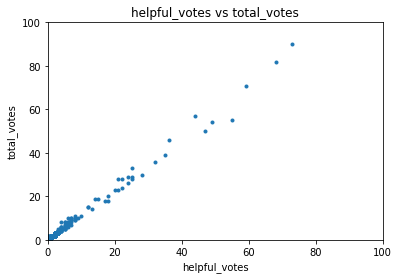

In [0]:
helpful_votes=[d['helpful_votes'] for d in dataset]
total_votes=[d['total_votes'] for d in dataset]
plt.gca().set(xlabel='helpful_votes',ylabel='total_votes',title='helpful_votes vs total_votes')
plt.axis([0, 100, 0, 100])
size = 500
plt.scatter(helpful_votes,total_votes,marker=".")


In [0]:
'''defaultdict"structure from the "collections"library allows us to automate
initializing a dictionary with all zero counts'''

In [0]:
#ratingcounts={1:0,2:0,3:0,4:0,5:0}
ratingcounts=defaultdict(int)
print('\n')
for d in dataset:
  ratingcounts[d['star_rating']]+=1
ratingcounts

defaultdict(int, {1: 121, 2: 61, 3: 140, 4: 394, 5: 6199})

[Text(0, 0.5, 'total number of ratings'),
 Text(0.5, 0, 'star ratings category'),
 Text(0.5, 1.0, 'star rating by category')]

([], <a list of 0 Text major ticklabel objects>)

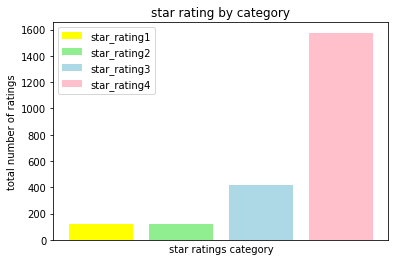

[Text(0, 0.5, 'total number of ratings'),
 Text(0.5, 0, 'star ratings category'),
 Text(0.5, 1.0, 'star rating by category')]

([], <a list of 0 Text major ticklabel objects>)

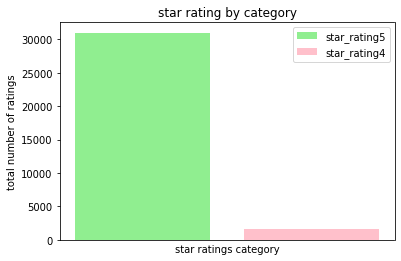

In [0]:
star1=sum([d['star_rating']for d in dataset if d['star_rating'] is 1 ])
star2=sum([d['star_rating']for d in dataset if d['star_rating'] is 2 ])
star3=sum([d['star_rating']for d in dataset if d['star_rating'] is 3 ])
star4=sum([d['star_rating']for d in dataset if d['star_rating'] is 4 ])
star5=sum([d['star_rating']for d in dataset if d['star_rating'] is 5 ])
index=[1]
p1=plt.bar(index,star1,color='yellow')
index=[2]
p2=plt.bar(index,star2,color='lightgreen')
index=[3]
p3=plt.bar(index,star3,color='lightblue')
index=[4]
p4=plt.bar(index,star4,color='pink')
plt.gca().set(title='star rating by category',ylabel='total number of ratings',xlabel='star ratings category')
plt.xticks([])
plt.legend((p1[0],p2[0],p3[0],p4[0]),('star_rating1','star_rating2','star_rating3','star_rating4'))
plt.show()
index=[1]
p5=plt.bar(index,star5,color='lightgreen')
index=[2]
p4=plt.bar(index,star4,color='pink')
plt.gca().set(title='star rating by category',ylabel='total number of ratings',xlabel='star ratings category')
plt.xticks([])
plt.legend((p5[0],p4[0]),('star_rating5','star_rating4'))
plt.show()

In [0]:
'''from Bar plot we can clearly find that star_rating5 count is signifiantly
high comapared to other star_ratings'''

In [0]:
ratingsperproduct=defaultdict(list)
for d in dataset:
  ratingsperproduct[d['product_id']].append(d['star_rating'])
ratingsperproduct['B004LLIL5A'][-15:]

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

In [0]:
#Average ratings per product stands out to be 4.8787

In [0]:

averageratingperproduct={}
for p in ratingsperproduct:
  averageratingperproduct[p]=sum(ratingsperproduct[p])/len(ratingsperproduct[p])
averageratingperproduct['B004LLIL5A']


4.878787878787879

In [0]:
toprated=[(averageratingperproduct[p],p) for p in averageratingperproduct 
          if len(ratingsperproduct)>50]
toprated.sort()
toprated[201:211]

[(4.785714285714286, 'B00CHQ7ESQ'),
 (4.78743961352657, 'B00IX1I3G6'),
 (4.791666666666667, 'B00A4EK4CQ'),
 (4.795454545454546, 'B00G4IV2VI'),
 (4.8, 'B004KNWWP4'),
 (4.8, 'B004KNWWWM'),
 (4.8, 'B004KNWX1M'),
 (4.8, 'B004WKPW0W'),
 (4.8, 'B005EISPLE'),
 (4.8, 'B005EISPOG')]

In [0]:
#verified_purchase is 6395. unverified purchase is 520.

In [0]:
verifiedcounts=defaultdict(int)
verifiedcounts
for d in dataset:
  verifiedcounts[d['verified_purchase']]+=1
verifiedcounts

defaultdict(int, {})

defaultdict(int, {False: 520, True: 6395})

In [0]:
dataset[0]
len(dataset)

{'customer_id': '48872127',
 'helpful_votes': 0,
 'marketplace': 'US',
 'product_category': 'Gift Card',
 'product_id': 'BT00CTOYC0',
 'product_parent': '506740729',
 'product_title': 'Amazon.com $15 Gift Card in a Greeting Card (Amazon Surprise Box Design)',
 'review_body': 'I love that I have instant, helpful options when I forget a birthday! Thanks for saving the day Amazon!',
 'review_date': '2015-08-31',
 'review_headline': 'Quick Solution for Forgotten Occasion',
 'review_id': 'RVN4P3RU4F8IE',
 'star_rating': 5,
 'total_votes': 0,
 'verified_purchase': True,
 'vine': False,
 'yearint': 2015}

6915

In [0]:
'''plotted a Bar chart between verified purchase and 
unverified purchase.verified purchase is 6395. unverified purchase is 520'''

520

6395

[Text(0, 0.5, 'total number of purchase'),
 Text(0.5, 0, 'purchase category'),
 Text(0.5, 1.0, 'verified vs unverified purchase')]

([], <a list of 0 Text major ticklabel objects>)

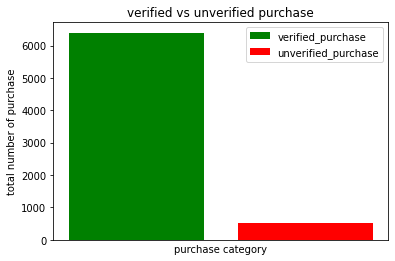

In [0]:
unverified_purchase=sum([d['verified_purchase']==False  for d in dataset ])
unverified_purchase
print('\n')
verified_purchase=sum([d['verified_purchase']== True for d in dataset])
verified_purchase
index=[1]
p1=plt.bar(index,verified_purchase,color='green')
index=[2]
p2=plt.bar(index,unverified_purchase,color='red')
plt.gca().set(title='verified vs unverified purchase',ylabel='total number of purchase',xlabel='purchase category')
plt.xticks([])
plt.legend((p1[0],p2[0]),('verified_purchase','unverified_purchase'))
plt.show()

In [0]:
productcounts=defaultdict(int)
for d in dataset:
  productcounts[d['product_id']]+=1

In [0]:
counts=[(productcounts[p],p) for p in productcounts]
counts.sort()
counts[-10:]

[(118, 'B004LLIKY2'),
 (134, 'BT00CTOUNS'),
 (148, 'B007V6EVY2'),
 (152, 'B00A48G0D4'),
 (152, 'BT00DDC7CE'),
 (154, 'B0091JKU5Q'),
 (167, 'B004KNWWO0'),
 (207, 'B00IX1I3G6'),
 (236, 'BT00DDVMVQ'),
 (508, 'B004LLIKVU')]

In [0]:
nRatings=len(dataset)
nRatings

6915

In [0]:
average=0
for d in dataset:
  average+=d['star_rating']
average/=nRatings
average

4.806073752711497

In [0]:
#total customer headcount is 3801 and products count is 848.

In [0]:

users=set()
items=set()
for d in dataset:
  users.add(d['customer_id'])
  items.add(d['product_id'])
len(users),len(items)

(3801, 848)

In [0]:
dataset[0]

{'customer_id': '48872127',
 'helpful_votes': 0,
 'marketplace': 'US',
 'product_category': 'Gift Card',
 'product_id': 'BT00CTOYC0',
 'product_parent': '506740729',
 'product_title': 'Amazon.com $15 Gift Card in a Greeting Card (Amazon Surprise Box Design)',
 'review_body': 'I love that I have instant, helpful options when I forget a birthday! Thanks for saving the day Amazon!',
 'review_date': '2015-08-31',
 'review_headline': 'Quick Solution for Forgotten Occasion',
 'review_id': 'RVN4P3RU4F8IE',
 'star_rating': 5,
 'total_votes': 0,
 'verified_purchase': True,
 'vine': False,
 'yearint': 2015}

In [0]:
avverified=0
avunverified=0
nverified=0
nunverified=0
for d in dataset:
  if d['verified_purchase']==True:
    avverified+=d['star_rating']
    nverified+=1
  else:
    avunverified+=d['star_rating']
    nunverified+=1
avverified/=nverified
avunverified/=nunverified
avverified,avunverified

(4.8151681000781865, 4.694230769230769)

In [0]:
'''Average for Verified rating is 4.8151. 
Average for unverified rating also is somewhere nearby i.e. 4.694'''

In [0]:
verifiedRatings=[d['star_rating'] for d in dataset 
                 if d['verified_purchase']==True ]
unverifiedRatings=[d['star_rating'] for d in dataset 
                 if d['verified_purchase']==False ]
sum(verifiedRatings)/len(verifiedRatings)
print('\n')
sum(unverifiedRatings)/len(unverifiedRatings)
dataset[0]

4.8151681000781865

4.694230769230769

{'customer_id': '48872127',
 'helpful_votes': 0,
 'marketplace': 'US',
 'product_category': 'Gift Card',
 'product_id': 'BT00CTOYC0',
 'product_parent': '506740729',
 'product_title': 'Amazon.com $15 Gift Card in a Greeting Card (Amazon Surprise Box Design)',
 'review_body': 'I love that I have instant, helpful options when I forget a birthday! Thanks for saving the day Amazon!',
 'review_date': '2015-08-31',
 'review_headline': 'Quick Solution for Forgotten Occasion',
 'review_id': 'RVN4P3RU4F8IE',
 'star_rating': 5,
 'total_votes': 0,
 'verified_purchase': True,
 'vine': False,
 'yearint': 2015}

In [0]:
import pandas as pd
df=pd.DataFrame(dataset)
df.head(5)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,yearint
0,US,48872127,RVN4P3RU4F8IE,BT00CTOYC0,506740729,Amazon.com $15 Gift Card in a Greeting Card (A...,Gift Card,5,0,0,False,True,Quick Solution for Forgotten Occasion,"I love that I have instant, helpful options wh...",2015-08-31,2015
1,US,25208893,R13UP4ELOFYDB5,B00PG40PAK,750842252,Amazon eGift Card - Truth in Gift Cards,Gift Card,5,0,0,False,True,"Easy, Safe, Reliable, Well Received by Recipients","Normally, I don't like gift cards conceptually...",2015-08-31,2015
2,US,13376158,R3KLV1HD0EFCSV,B005Z3D5OU,379368939,"Amazon.com Gift Cards, Pack of 3 (Various Desi...",Gift Card,5,1,2,False,True,Can't Go Wrong Plus Free Next Day Shipping,"Amazon gift cards are nothing new, and they ar...",2015-08-31,2015
3,US,47184195,R3SILVKZXUV8TT,B00A4EK4YO,16766865,Amazon eGift Card - Thank You (Global),Gift Card,5,0,0,False,True,This was a fantastic and quick opportunity to ...,This was a fantastic and quick opportunity to ...,2015-08-31,2015
4,US,1094807,R3U229HF6OOJXQ,B004LLIKVU,473048287,Amazon.com eGift Cards,Gift Card,5,0,0,False,True,Awesome,I am always adding money to m yt? Account and ...,2015-08-30,2015


In [0]:
df.columns

Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date', 'yearint'],
      dtype='object')

In [0]:
df.shape

(6915, 16)

In [0]:
'''star_rating,helpful_votes,total_votes,
yearint are scale variables,rest all are categorical variables'''

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6915 entries, 0 to 6914
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        6915 non-null   object
 1   customer_id        6915 non-null   object
 2   review_id          6915 non-null   object
 3   product_id         6915 non-null   object
 4   product_parent     6915 non-null   object
 5   product_title      6915 non-null   object
 6   product_category   6915 non-null   object
 7   star_rating        6915 non-null   int64 
 8   helpful_votes      6915 non-null   int64 
 9   total_votes        6915 non-null   int64 
 10  vine               6915 non-null   bool  
 11  verified_purchase  6915 non-null   bool  
 12  review_headline    6915 non-null   object
 13  review_body        6915 non-null   object
 14  review_date        6915 non-null   object
 15  yearint            6915 non-null   int64 
dtypes: bool(2), int64(4), object(10)
memory us

In [0]:
'''here we got more descriptions of the input variable 
and those descriptions are like getting mean,std deviation,min,max,and data in 
25%,50% and 75% quartile for all the listed input features'''

In [0]:
df.describe()

,star_rating,helpful_votes,total_votes,yearint
count,6915.000000,6915.000000,6915.000000,6915.000000
mean,4.806074,0.735358,0.861316,2013.421547
std,0.678074,29.120181,33.726331,1.055599
min,1.000000,0.000000,0.000000,2011.000000
25%,5.000000,0.000000,0.000000,2013.000000
50%,5.000000,0.000000,0.000000,2013.000000
75%,5.000000,0.000000,0.000000,2014.000000
max,5.000000,2383.000000,2763.000000,2015.000000


In [0]:
df.isnull().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
yearint              0
dtype: int64

In [0]:
#here for all categorical variables we convert bool values to equivalent 1 and 0.

In [0]:
#DUMMY CODING USING THE LOOP STRUCTURE
for col in df.columns:
  if df[col].dtype=='object':
    df[col]=pd.Categorical(df[col]).codes
df.head(5)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,yearint
0,0,3213,6722,775,258,521,0,5,0,0,False,True,3244,2337,1376,2015
1,0,1443,196,735,415,505,0,5,0,0,False,True,1157,4017,1376,2015
2,0,390,4678,250,172,578,0,5,1,2,False,True,738,354,1376,2015
3,0,3061,5090,401,44,494,0,5,0,0,False,True,3710,5456,1376,2015
4,0,105,5189,71,236,580,0,5,0,0,False,True,568,1719,1375,2015


In [0]:
#Here Box plot is plotted

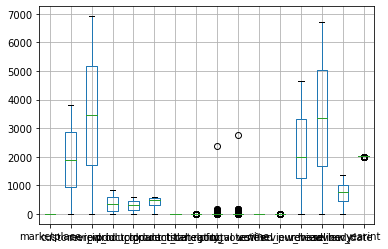

In [0]:
df.boxplot()

In [0]:
#here histogram is being plotted to draw comparisons between variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7724c6f160>,
      dtype=object)

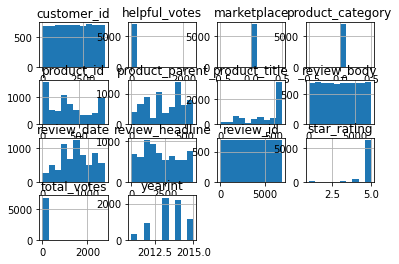

In [0]:
x=df.drop(['vine','verified_purchase'],axis=1)
x.hist(grid='off')

In [0]:
'''Heat map plotted to evaluate
correlation between the variables'''

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f77238b99e8>)

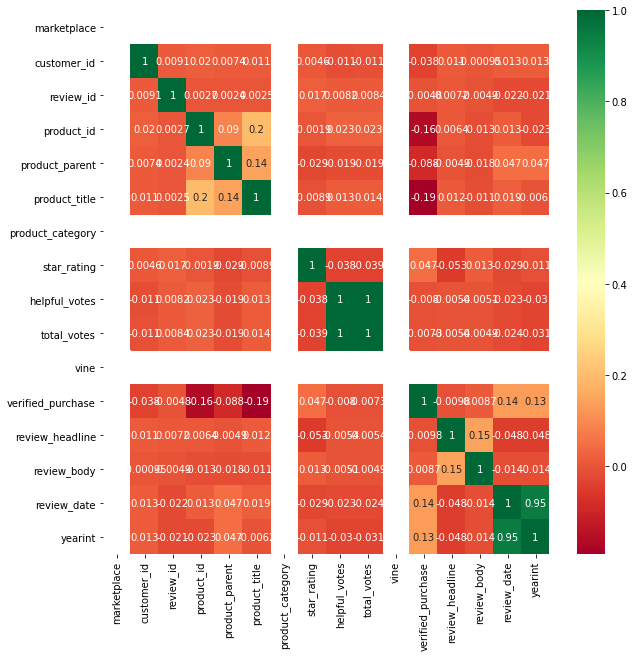

In [0]:
x=df.corr()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.subplots(figsize=(10,10))
sns.heatmap(x,cmap='RdYlGn',annot=True)
plt.show()

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f77232e6198>)

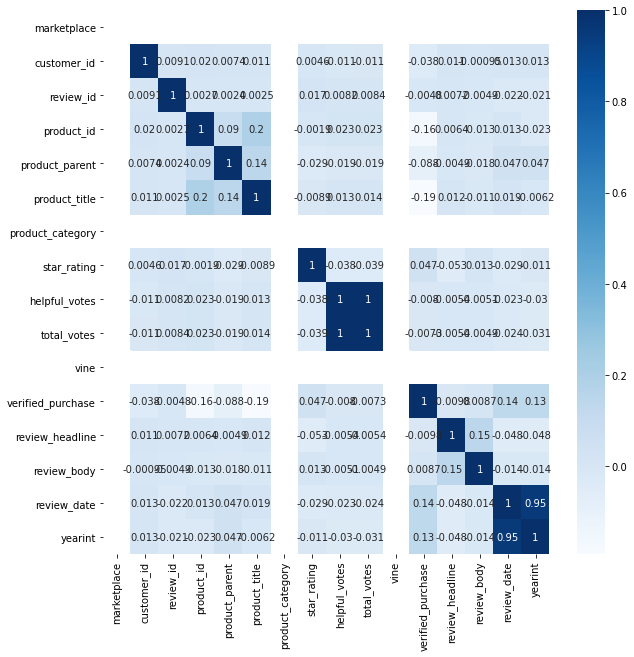

In [0]:
plt.subplots(figsize=(10,10))
sns.heatmap(x,cmap='Blues',annot=True)
plt.show()